# Welcome to the Jupiter notebook 
- Here I will work on the sakila database.
- The database is already loaded and is located in the data folder of this project.
- I loaded the database using dlt, and all the steps are described in the README file.

In [1]:
import duckdb
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt


# giving the path of the database
duckdb_path = "../data/sakila.duckdb"

# connection to the database
conn = duckdb.connect(duckdb_path)

# setting the schema 'staging' for avoid to write staging.tabel every time
conn.execute("SET search_path='staging';")

# test reading the first 3 films
df_films = conn.sql("SELECT * FROM film LIMIT 5;").df()
description = conn.sql("DESC;").df()

df_films    

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,_dlt_load_id,_dlt_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1764369431.1997082,L5oieRwKAj7kew
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764369431.1997082,6RgtLufzkJU6sQ
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764369431.1997082,xnr7Y29mIxPhnQ
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,1764369431.1997082,Jo+2n4NdGLglZw
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,1764369431.1997082,qNA831UpPJMcmA


In [2]:
df_actor = conn.sql("SELECT first_name FROM actor;").df()
df_actor.head()



,first_name
0,PENELOPE
1,NICK
2,ED
3,JENNIFER
4,JOHNNY


In [3]:
description.head()

,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False


## Answer to the question a task 1 
- Which movie are longer then 3 hors?


In [4]:
long_film = conn.sql("""--sql
    SELECT 
        title,
        length
    FROM
        film
    WHERE 
        length > 180;                
                     """).df()
long_film.count()
long_film.count()

title     39
length    39
dtype: int64

# So we have 39 movies that are longer then 3 hours in sakila database
 

# Now move on with the question b task 1 
- Which movie have the worl "love" in it's title?

In [5]:
love_word_film = conn.sql("""
    SELECT 
        title,
        rating,
        length,
        description
    FROM
        film
    WHERE 
        LOWER (title) LIKE '%love%';                
                     """).df()
love_word_film

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


# Now the question c in task 1 
- Calculate decriptive statistics on the lenght column on movie lenght

In [6]:
statistic = conn.sql("""
    SELECT
        MIN(length) AS min_length,
        MAX(length) AS max_length,
        AVG(length) AS avg_length,
        MEDIAN(length) AS median_length
    FROM film
""").df()

statistic


,min_length,max_length,avg_length,median_length
0,46,185,115.272,114.0


# Question d in the task 1 
- The 10 most expensive movies to rent per day

In [7]:
expensive_movie = conn.sql("""
    SELECT 
        title,
        ROUND(rental_rate / rental_duration, 3) AS cost_per_day                
    FROM film
    ORDER BY cost_per_day DESC
    LIMIT 10
                           """).df()
expensive_movie

,title,cost_per_day
0,ACE GOLDFINGER,1.663
1,AMERICAN CIRCUS,1.663
2,AUTUMN CROW,1.663
3,BACKLASH UNDEFEATED,1.663
4,BEAST HUNCHBACK,1.663
5,BEHAVIOR RUNAWAY,1.663
6,BILKO ANONYMOUS,1.663
7,CARIBBEAN LIBERTY,1.663
8,CASPER DRAGONFLY,1.663
9,CASUALTIES ENCINO,1.663


# Question e in the task 1
- Top 10 actors have playde 

In [8]:
top_actors = conn.sql("""
    SELECT 
        a.first_name,
        a.last_name,
        COUNT(*) AS film_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.first_name, a.last_name
    ORDER BY film_count DESC
    LIMIT 10
""").df()

top_actors


,first_name,last_name,film_count
0,SUSAN,DAVIS,54
1,GINA,DEGENERES,42
2,WALTER,TORN,41
3,MARY,KEITEL,40
4,MATTHEW,CARREY,39
5,SANDRA,KILMER,37
6,SCARLETT,DAMON,36
7,VAL,BOLGER,35
8,UMA,WOOD,35
9,ANGELA,WITHERSPOON,35


# Now let's explore a bit this database

1) For exemple which one are the top 10 movie in rental 
 

In [9]:
most_rented = conn.sql("""
    SELECT 
        f.title,
        COUNT(*) AS total_rentals
    FROM rental r
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN film f ON i.film_id = f.film_id
    GROUP BY f.title
    ORDER BY total_rentals DESC
    LIMIT 10
""").df()

most_rented


,title,total_rentals
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,RIDGEMONT SUBMARINE,32
3,JUGGLER HARDLY,32
4,SCALAWAG DUCK,32
5,FORWARD TEMPLE,32
6,GRIT CLOCKWORK,32
7,GOODFELLAS SALUTE,31
8,TIMBERLAND SKY,31
9,WIFE TURN,31


# 2) Which store works more?

In [10]:
store_revenue = conn.sql("""
    SELECT 
        s.store_id,
        SUM(p.amount) AS total_revenue
    FROM payment p
    JOIN rental r ON p.rental_id = r.rental_id
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN store s ON i.store_id = s.store_id
    GROUP BY s.store_id
    ORDER BY total_revenue DESC
""").df()

store_revenue


,store_id,total_revenue
0,2,33726.77
1,1,33679.79


# 3) How many movies there are for each rating?


In [11]:
df_ratings = conn.sql("""
    SELECT 
        rating
    FROM
        film
                      ;""").df()
df_ratings["rating"].value_counts()

rating
PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: count, dtype: int64

# 4) How much the store 2 have gained in may?

In [12]:
# select all the payment in the second store in dicember
df_may_range_store_2 = conn.sql("""
    SELECT 
        p.amount,
        p.payment_date
    FROM payment p
    JOIN rental r ON p.rental_id = r.rental_id
    JOIN inventory i ON r.inventory_id = i.inventory_id
    WHERE i.store_id = 2
      AND p.payment_date >= DATE '2005-05-02'
      AND p.payment_date <  DATE '2005-05-31'
""").df()

df_may_range_store_2.head()


,amount,payment_date
0,2.99,2005-05-25 11:30:37
1,0.99,2005-05-28 10:35:23
2,2.99,2005-05-29 22:43:55
3,0.99,2005-05-29 07:25:16
4,4.99,2005-05-25 08:43:32


- Now we can calcolate the total profit


In [13]:
tot_may = df_may_range_store_2["amount"].sum()
f"The store 2 in the may month have gaied:  {tot_may: .2f} dollars"

'The store 2 in the may month have gaied:   2017.00 dollars'

##### There is another thing we can do to optimize our workflow and use pandas commands more efficiently, without losing the ability to run SQL queries through conn.sql().
##### We can create an empty dictionary, and since we have already defined description as DESC;, this gives us all the table names, which we can use as keys in the new dictionary.

##### Then, using a for loop, we read each table and run a query like SELECT * FROM {name}, storing all the results inside the dictionary.

##### Essentially, we are copying the entire sakila database—with all its data—into a simple Python dictionary. This allows us to perform analysis much faster using pandas/Python syntax.

In [14]:
dfs = {}
for name in description["name"]:
    dfs[name] = conn.sql(f"SELECT * FROM {name}").df()
dfs.keys()

dict_keys(['_dlt_loads', '_dlt_pipeline_state', '_dlt_version', 'actor', 'address', 'category', 'city', 'country', 'customer', 'film', 'film_actor', 'film_category', 'inventory', 'language', 'payment', 'rental', 'staff', 'store'])

# Now operation like dataframe inspection will be much more easy for example:

In [15]:
dfs['film'].head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,_dlt_load_id,_dlt_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1764369431.1997082,L5oieRwKAj7kew
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764369431.1997082,6RgtLufzkJU6sQ
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764369431.1997082,xnr7Y29mIxPhnQ
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,1764369431.1997082,Jo+2n4NdGLglZw
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,1764369431.1997082,qNA831UpPJMcmA


In [16]:
dfs['actor'].sample(3)


,actor_id,first_name,last_name,last_update,_dlt_load_id,_dlt_id
84,85.0,MINNIE,ZELLWEGER,2021-03-06 15:51:59,1764369431.1997082,Qln9g3BHSRl3zg
34,35.0,JUDY,DEAN,2021-03-06 15:51:59,1764369431.1997082,s55/SDouw2wiOw
27,28.0,WOODY,HOFFMAN,2021-03-06 15:51:59,1764369431.1997082,CZej7OFQGpIlKA


In [17]:
dfs['inventory'].sample(3)

,inventory_id,film_id,store_id,last_update,_dlt_load_id,_dlt_id
2303,2304,501,1,2021-03-06 15:52:27,1764369431.1997082,ccUkh9UrxDR23Q
3639,3640,795,1,2021-03-06 15:52:37,1764369431.1997082,6QGNK73hGybmFg
1006,1007,226,1,2021-03-06 15:52:16,1764369431.1997082,4MNyLlrJnhWF/g


#   Cool!!!
## Let's go to the task 2 now 
###

#### 1) Let's calcolate the number of movies for each category
#### I will join :
- film_category (using category_id)
- category (using category_id)


In [18]:
df_cat = conn.sql(""" 
    SELECT 
        c.name AS category,
        COUNT (*) AS film_count
    FROM category c
    JOIN film_category fc ON c.category_id = fc. category_id
    GROUP BY c.name 
    ORDER BY film_count DESC;

""").df()


Now let's create a bar chart that show how many films belong to each category:

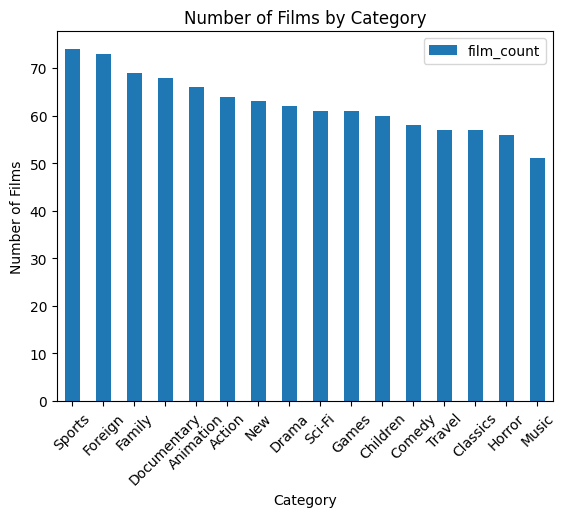

In [19]:
df_cat.plot(
    x="category",
    y="film_count",
    kind="bar",
    title="Number of Films by Category"
)
plt.xlabel("Category")
plt.ylabel("Number of Films")
plt.xticks(rotation=45)
plt.show()


# 2) Now I want to know wich one are the 5 cityes that have more rental 

In [20]:
df_top_city_rent = conn.sql("""  
    SELECT  
        ci.city AS city,
        COUNT(*) AS rental_count
    FROM rental r
    JOIN customer c ON r.customer_id = c.customer_id
    JOIN address a ON c.address_id = a.address_id
    JOIN city ci ON a.city_id = ci.city_id
    GROUP BY ci.city
    ORDER BY rental_count DESC 
    LIMIT 5;
""").df()
df_top_city_rent

,city,rental_count
0,Aurora,50
1,London,48
2,Saint-Denis,46
3,Cape Coral,45
4,Tanza,42


# Now we have the top 5 citys, let's putt those data in a figure matplotlib

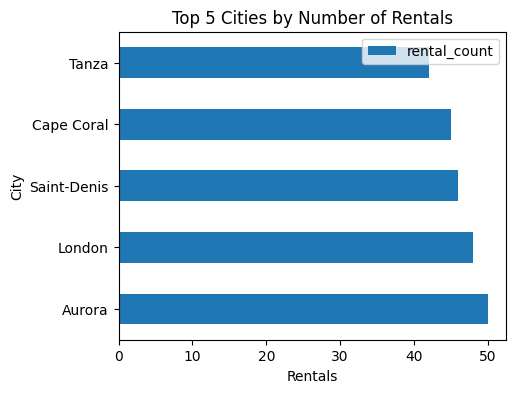

In [21]:
df_top_city_rent.plot(
    x="city",
    y="rental_count",
    kind="barh",
    figsize=(5,4),
    title="Top 5 Cities by Number of Rentals"
)

plt.xlabel("Rentals")
plt.ylabel("City")
plt.show()




## 3) Now I would like to find out which months generated the most revenue and present it in a chart that helps us understand which periods are the most profitable in this sector.
 From previous analyses, I noticed that this database does not contain complete month-by-month data, so first I will identify which months are actually represented and which ones are missing. Then I will calculate the total revenue for the available months and visualize everything in a figure.

In [22]:
conn.sql("""
    SELECT 
        MIN(payment_date) AS first_payment,
        MAX(payment_date) AS last_payment
    FROM payment;
""").df()


,first_payment,last_payment
0,2005-05-24 22:53:30,2006-02-14 15:16:03


In [23]:
df_months = conn.sql("""
    SELECT DISTINCT DATE_TRUNC('month', payment_date) AS month
    FROM payment
    ORDER BY month;
""").df()

df_months


,month
0,2005-05-01
1,2005-06-01
2,2005-07-01
3,2005-08-01
4,2006-02-01


#### So let's extract the real month revenue (that one that olds only the month that are not 0) 

In [24]:
df_monthly = conn.sql("""
    SELECT 
        strftime('%Y-%m', DATE_TRUNC('month', p.payment_date)) AS month,
        SUM(p.amount) AS monthly_revenue
    FROM payment p
    GROUP BY month
    ORDER BY month;
""").df()

df_monthly


,month,monthly_revenue
0,2005-05,4824.43
1,2005-06,9631.88
2,2005-07,28373.89
3,2005-08,24072.13
4,2006-02,514.18


# Then build the figure with those data.

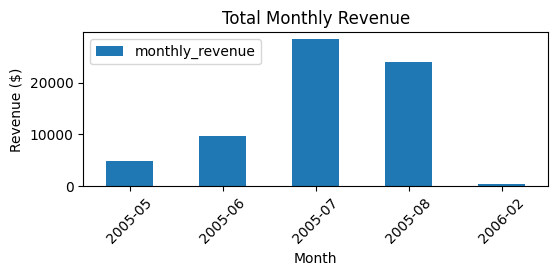

In [25]:
df_monthly.plot(
    x="month",
    y="monthly_revenue",
    kind="bar",
    figsize=(6,2),
    title="Total Monthly Revenue"
)

plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()


# Task 2 b) Who are our top 5 customers by total spend?

In [26]:
df_top_5_customers = conn.sql(""" 
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name AS name_customer,
        SUM(p.amount) AS total_spent            

    FROM payment p
    JOIN customer c ON p.customer_id = c.customer_id
    GROUP BY c.customer_id , name_customer 
    ORDER BY 
        total_spent DESC
    LIMIT 5;
""").df()

df_top_5_customers


,customer_id,name_customer,total_spent
0,526,KARL SEAL,221.55
1,148,ELEANOR HUNT,216.54
2,144,CLARA SHAW,195.58
3,178,MARION SNYDER,194.61
4,137,RHONDA KENNEDY,194.61


# That give us the top 5 customers in order to how much monay they have spent.
We can put thos in a figure. 

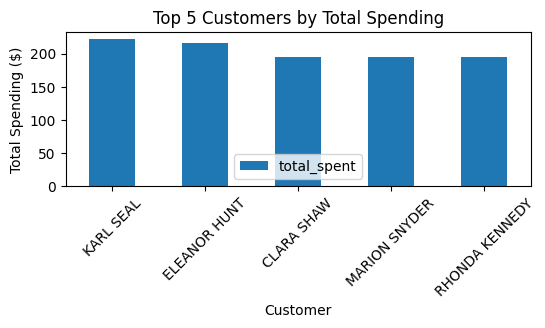

In [27]:
df_top_5_customers.plot(
    x="name_customer",
    y="total_spent",
    kind="bar",
    figsize=(6,2),
    title="Top 5 Customers by Total Spending"
)
plt.xlabel("Customer")
plt.ylabel("Total Spending ($)")
plt.xticks(rotation=45)
plt.show()


# Task 2 c)  How much monay does each film category brings in? 

In [28]:
df_cat_rev = conn.sql("""
    SELECT 
        c.name AS category,
        SUM(p.amount) AS total_revenue
    FROM payment p
    JOIN rental r ON p.rental_id = r.rental_id
    JOIN inventory i ON r.inventory_id = i.inventory_id
    JOIN film_category fc ON i.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name
    ORDER BY total_revenue DESC
""").df()
df_cat_rev

,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


# Let's see that in a figure.

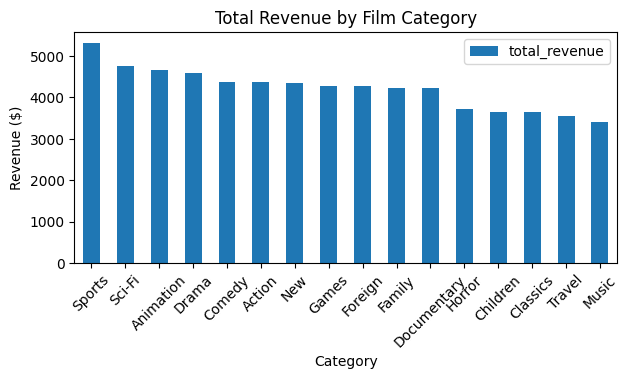

In [29]:
df_cat_rev.plot(
    x="category",
    y="total_revenue",
    kind="bar",
    figsize=(7,3),

    title="Total Revenue by Film Category"
)
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()
